In [15]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [16]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [17]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [18]:
INSTITUTION_ID = "ins_109508"

In [19]:
from plaid import Client
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [20]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [21]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [22]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

### 2. Print the categories for each transaction

In [23]:
print(json.dumps(transactions_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "3y5RpaambqhgVLz6XJwQHnAkmrloZEcqlM1wl",
        "account_owner": null,
        "amount": 25,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2019-09-18",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction_id": 

In [24]:
for transactions in transactions_response['transactions']:
    if transactions['category'] != "":
        print(json.dumps(transactions['category'][0],indent=4, sort_keys=True))

"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [25]:
dataframe = pd.DataFrame(transactions_response['transactions'], columns=['date','name','amount','category'])
dataframe['category'] = dataframe['category'].str[0]
dataframe

,date,name,amount,category
0,2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2019-09-18,Uber 063015 SF**POOL**,5.40,Travel
2,2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2019-09-16,Touchstone Climbing,78.50,Recreation
5,2019-09-16,United Airlines,-500.00,Travel
6,2019-09-15,McDonald's,12.00,Food and Drink
7,2019-09-15,Starbucks,4.33,Food and Drink
8,2019-09-14,SparkFun,89.40,Food and Drink
9,2019-09-13,INTRST PYMNT,-4.22,Transfer


In [26]:
dataframe.shape

(48, 4)

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [27]:
dataframe['date']=pd.to_datetime(dataframe['date'],format='%Y-%m-%d')

In [28]:
dataframe.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

---

In [29]:
dataframe = dataframe.set_index('date')

In [30]:
dataframe

,name,amount,category
date,,,
2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2019-09-18,Uber 063015 SF**POOL**,5.40,Travel
2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer
2019-09-16,Touchstone Climbing,78.50,Recreation
2019-09-16,United Airlines,-500.00,Travel
2019-09-15,McDonald's,12.00,Food and Drink
2019-09-15,Starbucks,4.33,Food and Drink
2019-09-14,SparkFun,89.40,Food and Drink


# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [31]:
income_response = client.Income.get(access_token)
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "IlsTz2oERzsStOz"
}


In [34]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response_year = client.Transactions.get(access_token, start_date, end_date)

In [36]:
dataframe_year = pd.DataFrame(transactions_response_year['transactions'], columns=['date','name','amount','category'])
dataframe_year['category'] = dataframe_year['category'].str[0]
dataframe_year['date']=pd.to_datetime(dataframe_year['date'],format='%Y-%m-%d')
dataframe_year = dataframe_year.set_index('date')
dataframe_year.tail()

,name,amount,category
date,,,
2019-03-31,Madison Bicycle Shop,500.0,Shops
2019-03-22,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2019-03-22,Uber 063015 SF**POOL**,5.4,Travel
2019-03-21,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2019-03-21,CD DEPOSIT .INITIAL.,1000.0,Transfer


In [37]:
group_data_year = dataframe_year.groupby('name')['amount'].sum()
group_data_year


name
ACH Electronic CreditGUSTO PAY 123456    40950.00
AUTOMATIC PAYMENT - THANK                12471.00
CD DEPOSIT .INITIAL.                      7000.00
CREDIT CARD 3333 PAYMENT *//               175.00
INTRST PYMNT                               -25.32
KFC                                       3000.00
Madison Bicycle Shop                      3000.00
McDonald's                                  72.00
SparkFun                                   536.40
Starbucks                                   25.98
Tectra Inc                                3000.00
Touchstone Climbing                        471.00
Uber 063015 SF**POOL**                      37.80
Uber 072515 SF**POOL**                      37.98
United Airlines                              0.00
Name: amount, dtype: float64

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

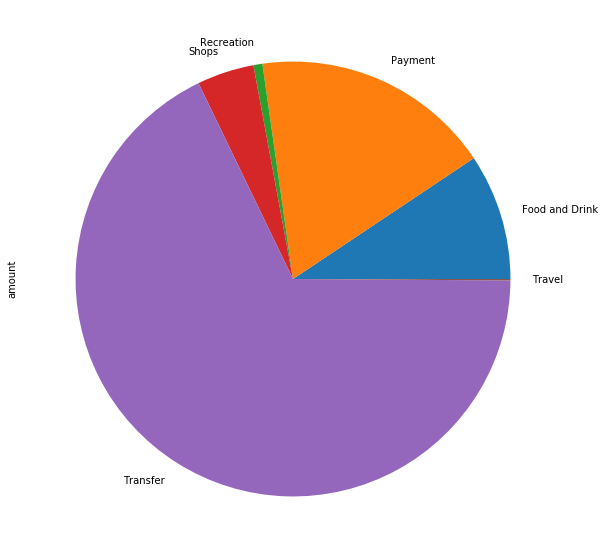

In [191]:
group_cats_year = dataframe_year.groupby('category').sum()['amount']
group_cats_year.plot.pie(figsize =(20,10))

In [186]:
group_cats_year

category
Food and Drink     6634.38
Payment           12646.00
Recreation          471.00
Shops              3000.00
Transfer          47924.68
Travel               75.78
Name: amount, dtype: float64

### Calculate the expenses per month

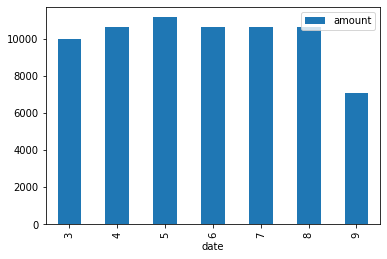

In [187]:
group_monthly = dataframe_year.groupby(dataframe_year.index.month)
group_monthly.sum().plot(kind="bar")